# NLP
Natural Language Processing using Sklearn's Pipeline

**Data**: Text Messages

**Source**: UCI Machine Learning Repository

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Import nltk to download stopwords template
# nltk.download_shell()

In [3]:
# Import data from tab seperated document
messages = pd.read_csv('SMSSpamCollection', delimiter='\t',names=['label','text'] )

In [4]:
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Add a char length column
messages['text length'] = messages['text'].apply(len)

In [7]:
messages.head()

,label,text,text length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
# We have a large novel type text massage (Max char of 910)
messages.describe()

,text length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


# Exploratory Data Analysis (EDA)

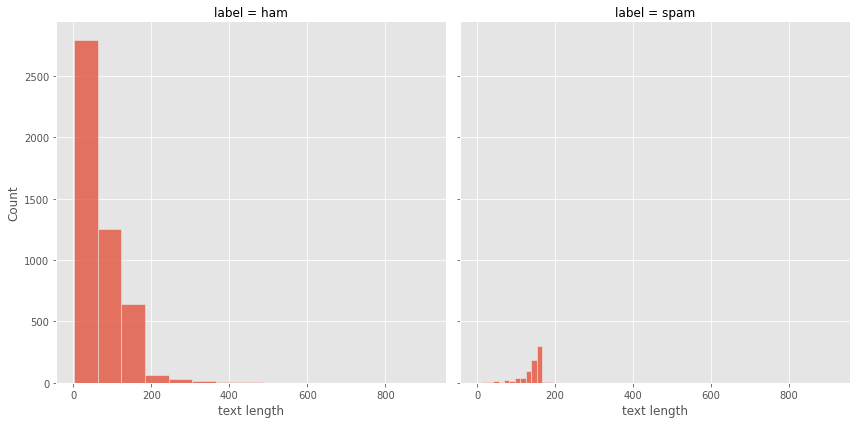

In [9]:
# Compare text length side by side with spam or no spam
g = sns.FacetGrid(data=messages, col='label', height=6)
g.map(sns.histplot, 'text length', bins=15)

<AxesSubplot:xlabel='label', ylabel='text length'>

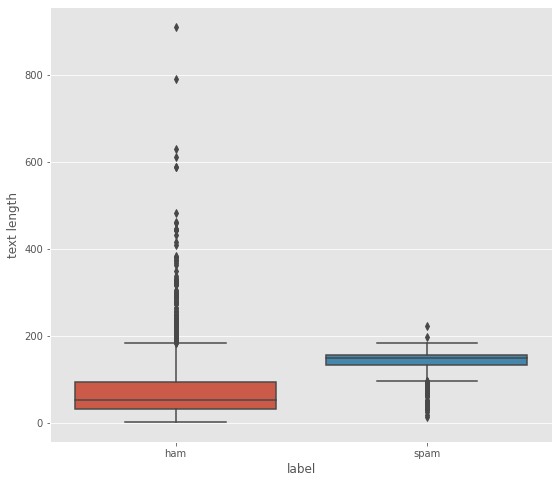

In [10]:
# Get box plots of both spam and no spam
plt.figure(figsize=(9,8))
sns.boxplot(data=messages, x='label', y='text length')

<AxesSubplot:xlabel='label', ylabel='count'>

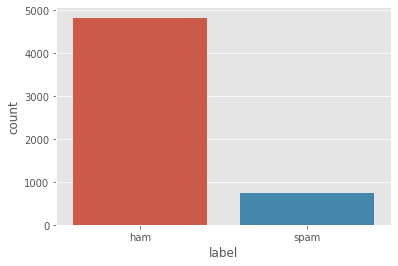

In [11]:
# Show counts
sns.countplot(data=messages, x='label')

In [12]:
# Descriptive statistics for each label
messages.groupby('label').describe()

text length                                                         
            count        mean        std   min    25%    50%    75%    max
label                                                                     
ham        4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam        747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [13]:
# Import stopwords
from nltk.corpus import stopwords

# Preview first 10 words that are common words
stop_words = stopwords.words('english')
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
# Explore how to normalize text
import re, string
msg01 = messages['text'][910]
msg01_nopunctuation = ''.join([char for char in msg01 if char not in string.punctuation])
msg01_cleaned = ' '.join([word for word in msg01_nopunctuation.split() if word not in stop_words])
print('Sample message:', msg01[:50])
print('Message without punctuation:', msg01_nopunctuation[:50])
print('Message cleaned:', msg01_cleaned[:50])

Sample message: January Male Sale! Hot Gay chat now cheaper, call 
Message without punctuation: January Male Sale Hot Gay chat now cheaper call 08
Message cleaned: January Male Sale Hot Gay chat cheaper call 087092


In [15]:
# Create a function to normalize text
def normalize_text(mess):
    '''
    1. Remove punctuation
    2. Remove stopwords (common words)
    3. Return a list of tokenized words
    '''
    no_punctuation = ''.join([char for char in mess if char not in string.punctuation])
    return [word for word in no_punctuation.split() if word not in stop_words]

In [16]:
# See difference for one sample
print(messages['text'][13])
print(normalize_text(messages['text'][13]))

I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
['Ive', 'searching', 'right', 'words', 'thank', 'breather', 'I', 'promise', 'wont', 'take', 'help', 'granted', 'fulfil', 'promise', 'You', 'wonderful', 'blessing', 'times']


In [17]:
# We have successfully tokenized our message
messages['text'].apply(normalize_text)[:5]

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: text, dtype: object

In [18]:
# Split the data to test model
from sklearn.model_selection import train_test_split
X = messages['text']
y = messages['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=13)

In [19]:
# Create a pipeline with sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=normalize_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [20]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function normalize_text at 0x00000231DCCB6170>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [21]:
# Get predictions
predictions = pipeline.predict(X_test)

In [22]:
# Test model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1439    0]
 [  77  156]]
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1439
        spam       1.00      0.67      0.80       233

    accuracy                           0.95      1672
   macro avg       0.97      0.83      0.89      1672
weighted avg       0.96      0.95      0.95      1672



In [23]:
# Try model without TFIDF
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=normalize_text)),
    ('classifier', MultinomialNB())
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1432    7]
 [  21  212]]
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1439
        spam       0.97      0.91      0.94       233

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672

